# Import library

In [40]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from dython.nominal import theils_u
from tabulate import tabulate


In [41]:
#read data from csv into pandas dataframe
df = pd.read_csv('Crash_Data.csv')
df.head()

/var/folders/bq/02b6z17j54jfyf3x41wyw48w0000gn/T/ipykernel_6079/454453948.py:2: DtypeWarning: Columns (10,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Crash_Data.csv')


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


In [42]:
df.columns

Index(['Crash ID', 'State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type',
       'Bus Involvement', 'Heavy Rigid Truck Involvement',
       'Articulated Truck Involvement', 'Speed Limit', 'Road User', 'Gender',
       'Age', 'National Remoteness Areas', 'SA4 Name 2016',
       'National LGA Name 2017', 'National Road Type', 'Christmas Period',
       'Easter Period', 'Age Group', 'Day of week', 'Time of day'],
      dtype='object')

## Check the missing value 

In [43]:
print(df.isnull().sum())

Crash ID                             0
State                                0
Month                                0
Year                                 0
Dayweek                              0
Time                                40
Crash Type                           0
Bus Involvement                     22
Heavy Rigid Truck Involvement    20515
Articulated Truck Involvement       22
Speed Limit                        702
Road User                            0
Gender                              27
Age                                  0
National Remoteness Areas        45965
SA4 Name 2016                    45951
National LGA Name 2017           45950
National Road Type               45966
Christmas Period                     0
Easter Period                        0
Age Group                           90
Day of week                          0
Time of day                          0
dtype: int64


## Exploratory Data Analysis


In [44]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52843 entries, 0 to 52842
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       52843 non-null  int64 
 1   State                          52843 non-null  object
 2   Month                          52843 non-null  int64 
 3   Year                           52843 non-null  int64 
 4   Dayweek                        52843 non-null  object
 5   Time                           52803 non-null  object
 6   Crash Type                     52843 non-null  object
 7   Bus Involvement                52821 non-null  object
 8   Heavy Rigid Truck Involvement  32328 non-null  object
 9   Articulated Truck Involvement  52821 non-null  object
 10  Speed Limit                    52141 non-null  object
 11  Road User                      52843 non-null  object
 12  Gender                         52816 non-null  object
 13  A

# Cleaning the data 


In [45]:
# Drop some columns 
columns_to_be_removed = ["National Remoteness Areas","SA4 Name 2016","National LGA Name 2017","National Road Type","Heavy Rigid Truck Involvement"]
for col in columns_to_be_removed:
    df.drop([col], axis=1, inplace=True)

df.isnull().sum()

# Create the imputer object
imputer = SimpleImputer(strategy='most_frequent')

# Replace missing values with the most frequent value of the corresponding column
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# # Check for missing values
print(df.isnull().sum())

df["Time"] = df["Time"].str.split(":").str.join(".")
df["Time"] = df["Time"].astype("float64")
df["Time"].dtype

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Month'] = pd.to_numeric(df['Month'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Crash ID'] = pd.to_numeric(df['Crash ID'], errors='coerce')
df = df[pd.to_numeric(df['Speed Limit'], errors='coerce').notnull()]
df['Speed Limit'] = pd.to_numeric(df['Speed Limit'], errors='coerce')

print(df.dtypes)


Crash ID                         0
State                            0
Month                            0
Year                             0
Dayweek                          0
Time                             0
Crash Type                       0
Bus Involvement                  0
Articulated Truck Involvement    0
Speed Limit                      0
Road User                        0
Gender                           0
Age                              0
Christmas Period                 0
Easter Period                    0
Age Group                        0
Day of week                      0
Time of day                      0
dtype: int64
Crash ID                           int64
State                             object
Month                              int64
Year                               int64
Dayweek                           object
Time                             float64
Crash Type                        object
Bus Involvement                   object
Articulated Truck Involvement

### Convert all possible columns to numeric dtype

In [46]:
print("Number of duplicated rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
def find_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] < Q1-1.5*IQR) | (df[col] > Q3+1.5*IQR)]

int_and_float_cols = df.select_dtypes(include=["int64","float64"])
for col in int_and_float_cols.columns:
    print(f"Outliers in {col}: {find_outliers(df, col).shape[0]}")

Number of duplicated rows: 157
Outliers in Crash ID: 0
Outliers in Month: 0
Outliers in Year: 0
Outliers in Time: 0
Outliers in Speed Limit: 683
Outliers in Age: 0


In [47]:
q1 = df['Speed Limit'].quantile(0.25)
q3 = df['Speed Limit'].quantile(0.75)
lower_bound = q1 - 1.5*(q3-q1)
upper_bound = q3 + 1.5*(q3-q1)

df['Speed Limit'] = np.where(df['Speed Limit'] < lower_bound, lower_bound, df['Speed Limit'])
df['Speed Limit'] = np.where(df['Speed Limit'] > upper_bound, upper_bound, df['Speed Limit'])


# Visualization

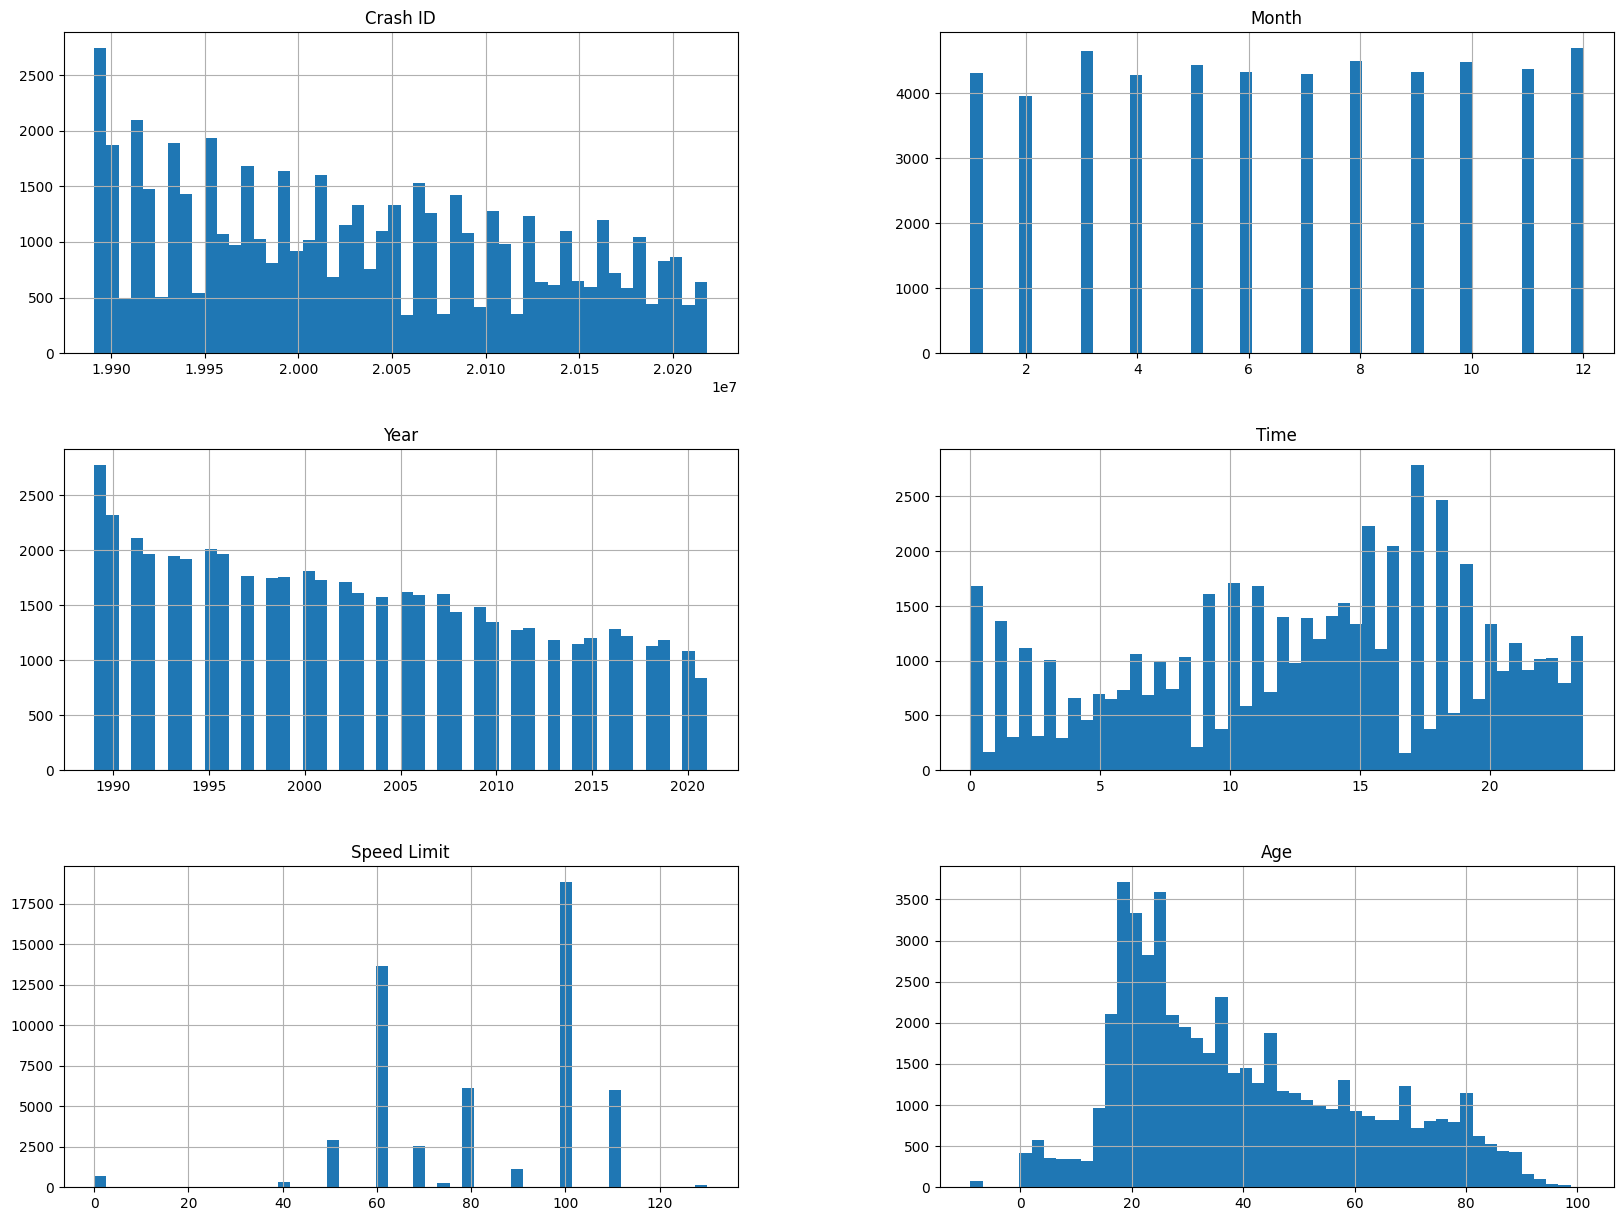

In [48]:

df.hist(bins=50, figsize=(20, 15))
plt.show()

             Crash ID     Month      Year      Time  Speed Limit       Age
Crash ID     1.000000 -0.021941  0.999845 -0.011111     0.055280  0.125267
Month       -0.021941  1.000000 -0.022164  0.002311     0.006282 -0.008523
Year         0.999845 -0.022164  1.000000 -0.011491     0.055419  0.126468
Time        -0.011111  0.002311 -0.011491  1.000000    -0.025467  0.041959
Speed Limit  0.055280  0.006282  0.055419 -0.025467     1.000000 -0.047768
Age          0.125267 -0.008523  0.126468  0.041959    -0.047768  1.000000


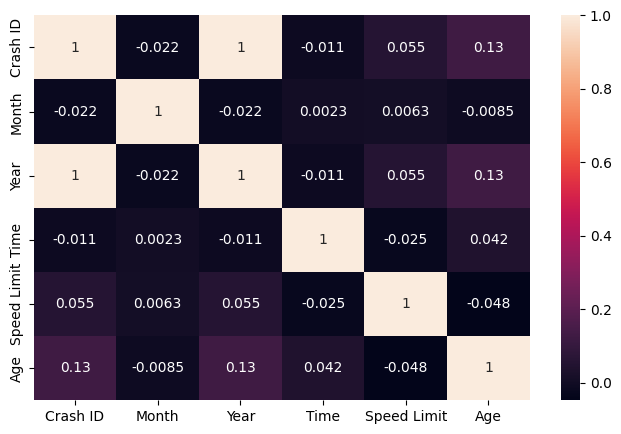

In [49]:
# Select only the numerical variables from the dataframe 'df'
numerical_df = df.select_dtypes(include='number')

# Create a figure with a specific size and dpi
plt.figure(figsize=(8, 5), dpi=100)

# Create a heatmap using the correlation matrix of the numerical variables
heatmap = sns.heatmap(numerical_df.corr(), annot=True)

# Extract the correlation matrix table
corr_matrix = numerical_df.corr()

# Print the correlation matrix table
print(corr_matrix)

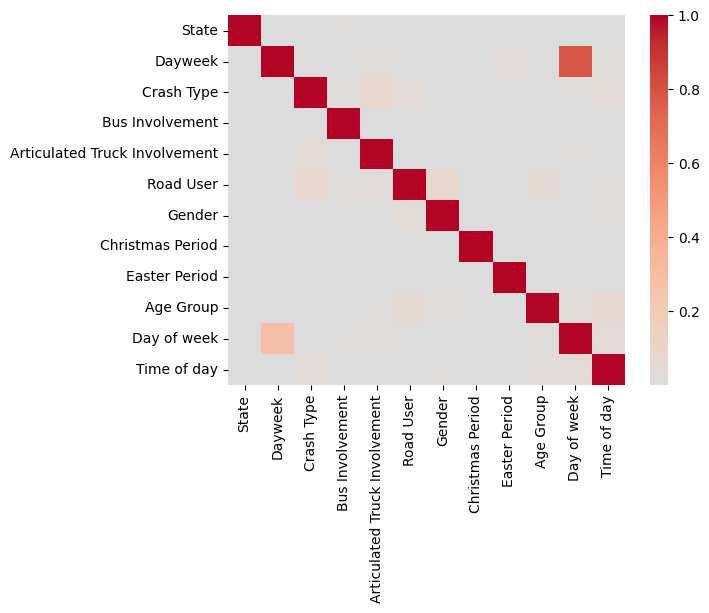

                                  State   Dayweek  Crash Type  \
State                          1.000000  0.000504    0.007368   
Dayweek                        0.000561  1.000000    0.005259   
Crash Type                     0.002921  0.001871    1.000000   
Bus Involvement                0.000664  0.000344    0.002163   
Articulated Truck Involvement  0.001190  0.003257    0.039964   
Road User                      0.003227  0.003377    0.078701   
Gender                         0.000092  0.000612    0.003533   
Christmas Period               0.000074  0.000318    0.000079   
Easter Period                  0.000030  0.000579    0.000009   
Age Group                      0.003267  0.005217    0.005741   
Day of week                    0.000266  0.274859    0.007808   
Time of day                    0.000702  0.004137    0.031654   

                               Bus Involvement  Articulated Truck Involvement  \
State                                 0.012555                       0.00

In [50]:

categorical_columns = df.select_dtypes(include=['object']).columns

data_categorical = df[categorical_columns]

# Compute Theil's U matrix
theils_u_matrix = data_categorical.apply(lambda x: data_categorical.apply(lambda y: theils_u(x, y)))

# Visualize the Theil's U matrix using a heatmap
sns.heatmap(theils_u_matrix, cmap='coolwarm', center=0)
plt.show()

# Save the Theil's U matrix as a DataFrame
theils_u_df = pd.DataFrame(theils_u_matrix, columns=theils_u_matrix.columns, index=theils_u_matrix.index)

# Display the Theil's U matrix as a table
print(theils_u_df)

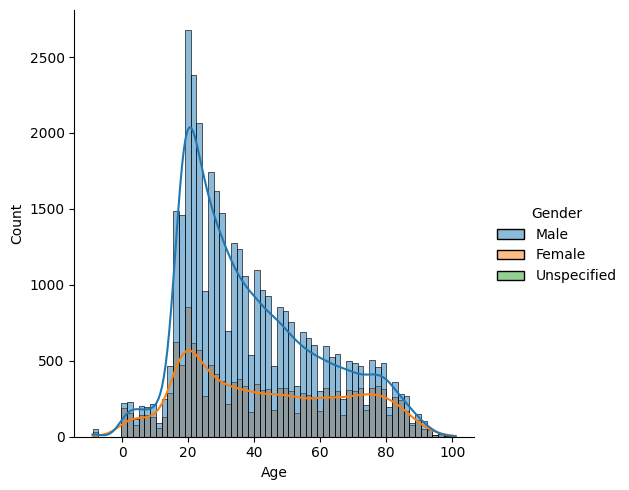

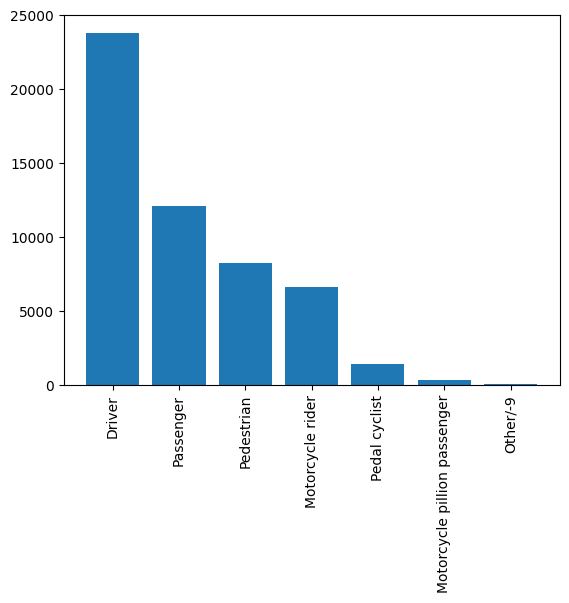

In [51]:
#ata distribution
sns.displot(df, x="Age", hue="Gender", kde=True)
plt.show()

# # road users count
road_users = df["Road User"].value_counts()
plt.bar(road_users.index, road_users.values)
plt.xticks(rotation=90)
plt.show()



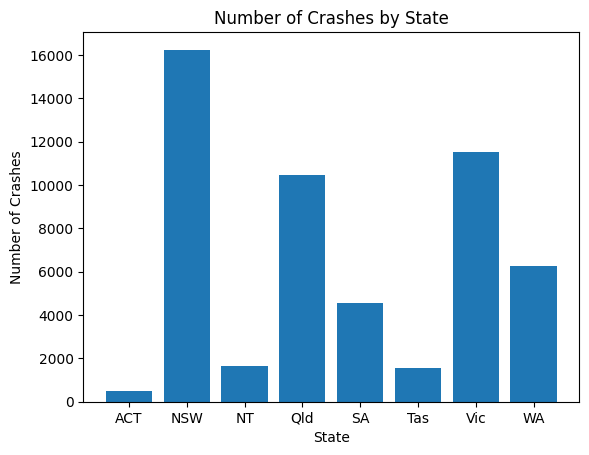

Number of crashes by state:
State
ACT      478
NSW    16243
NT      1631
Qld    10462
SA      4535
Tas     1541
Vic    11530
WA      6259
Name: Crash ID, dtype: int64


In [52]:
# Group the data by state and count the number of crashes in each state
crashes_by_state = df.groupby('State')['Crash ID'].count()

# Plot the crashes by state
plt.bar(crashes_by_state.index, crashes_by_state.values)
plt.title("Number of Crashes by State")
plt.xlabel("State")
plt.ylabel("Number of Crashes")
plt.show()

# Print the number of crashes by state
print("Number of crashes by state:")
print(crashes_by_state)

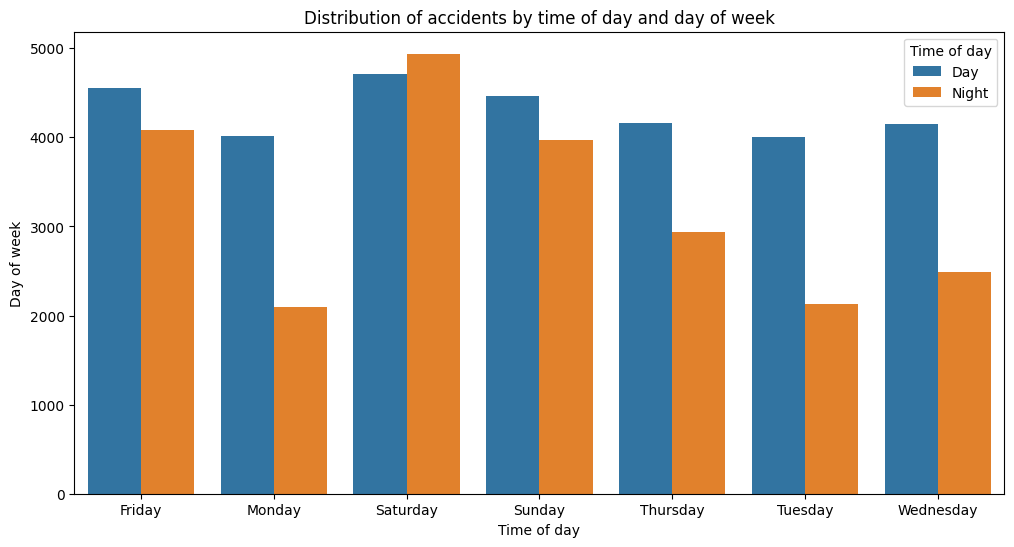

In [53]:

# Create a bar chart to visualize the distribution of accidents by time of day and day of week
daytime_counts = df.groupby(['Dayweek', 'Time of day']).size().reset_index(name='Count')
plt.figure(figsize=(12,6))
plt.title('Distribution of accidents by time of day and day of week')
sns.barplot(data=daytime_counts, x='Dayweek', y='Count', hue='Time of day')
plt.xlabel('Time of day')
plt.ylabel('Day of week')
plt.show()

# MODELLING

In [54]:
data = df 

# Step 1: Convert categorical variables to dummy variables
cat_cols = ['Road User', 'Gender', 'Age', 'Dayweek', 'State', 'Speed Limit']
df_dummies = pd.get_dummies(data[cat_cols], drop_first= True)

# Step 2: Create binary target column
data['Target'] = np.where(data['Time of day'] == 'Night', 1, 0)

# Step 3: Prepare X and Y variables
X = df_dummies
y = data['Target']

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Step 5: Fit logistic regression model to training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Step 6: Predict on testing set and evaluate performance
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6520501138952164
Precision: 0.6101333333333333
Recall: 0.5093499554764025
F1 Score: 0.555205047318612


/Users/louistran/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.76      0.71      6044
           1       0.61      0.51      0.56      4492

    accuracy                           0.65     10536
   macro avg       0.64      0.63      0.63     10536
weighted avg       0.65      0.65      0.65     10536



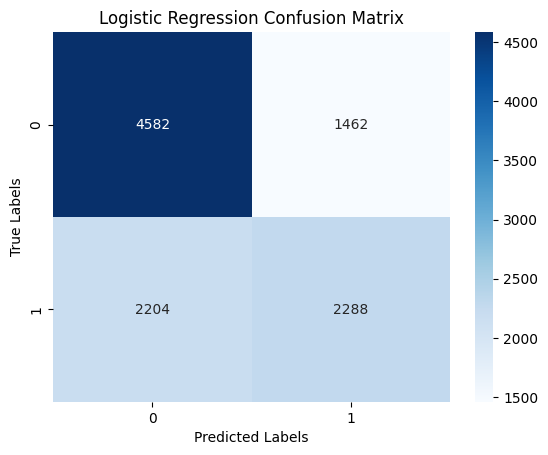

[[4582 1462]
 [2204 2288]]


In [57]:

# Plot the confusion matrix for logistic regression
sns.heatmap(confusion_matrix(y_test, y_pred), fmt='d', annot=True, cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)


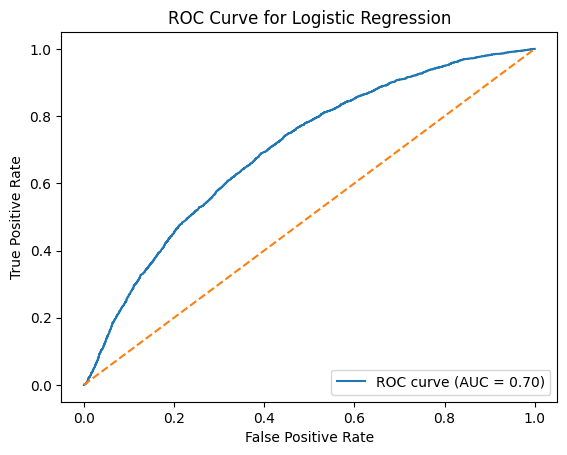

In [58]:
# Make predictions on the test data
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve and AUC score
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# EVALUATE INDEPENDENT VARIABLES

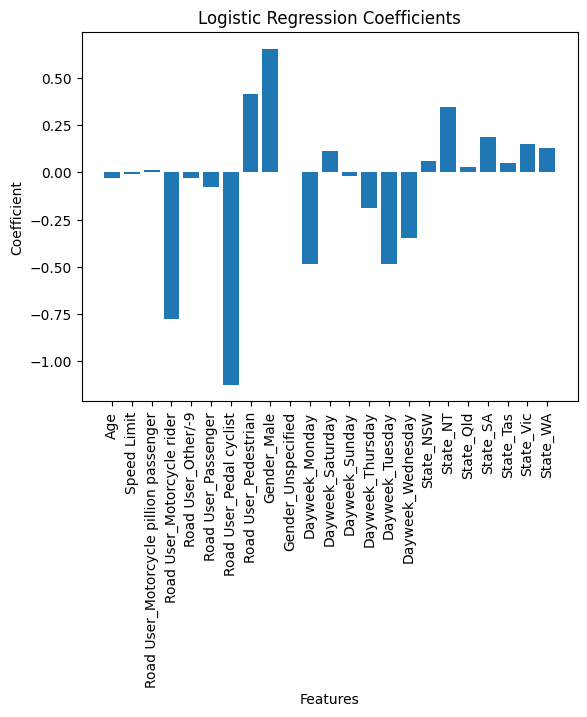

In [59]:

# Get coefficients and feature names
coef = logreg.coef_[0]
features = X.columns

# Create bar plot
plt.bar(features, coef)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.title("Logistic Regression Coefficients")
plt.show()

In [60]:
# get the list of attribute names
attribute_names = list(X.columns)

# create a list of tuples containing the attribute name and coefficient value
coefficients = list(zip(attribute_names, logreg.coef_[0]))

# sort the coefficients list by the absolute value of the coefficient
coefficients_sorted = sorted(coefficients, key=lambda x: abs(x[1]), reverse=True)

# print the table of sorted coefficients
print(tabulate(coefficients_sorted, headers=['Attribute', 'Coefficient']))

Attribute                                 Coefficient
--------------------------------------  -------------
Road User_Pedal cyclist                   -1.12657
Road User_Motorcycle rider                -0.77896
Gender_Male                                0.657246
Dayweek_Monday                            -0.487353
Dayweek_Tuesday                           -0.484886
Road User_Pedestrian                       0.418968
State_NT                                   0.346907
Dayweek_Wednesday                         -0.346507
Dayweek_Thursday                          -0.189224
State_SA                                   0.186616
State_Vic                                  0.150892
State_WA                                   0.12881
Dayweek_Saturday                           0.11501
Road User_Passenger                       -0.077529
State_NSW                                  0.0608874
State_Tas                                  0.0513796
Road User_Other/-9                        -0.0313414
State_Qld